 # Quantium Virtual Internship - Retail Strategy and Analytics - Task 1

## Background information
You are part of Quantium’s retail analytics team and have been approached by your client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.

## Task description
We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour.

In [3]:
# import necessary libraries
import pandas as pd
import numpy as np

In [4]:
file_transaction = './QVI_transaction_data.xlsx'
file_purchase_behaviour = './QVI_purchase_behaviour.csv'
df_tran = pd.read_excel(file_transaction)
df_pur = pd.read_csv(file_purchase_behaviour)

## Exploratory data analysis

The first step in any analysis is to first understand the data. Let’s take a look at each of the datasets provided.

### Examining transaction data

In [5]:
# look at our file structure (transactions)
df_tran.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
# look at our file structure (purchase behaviour)
df_pur.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [7]:
#confirm data structure
df_tran.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [8]:
#confirm data structure
df_pur.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

#### Convert DATE column to a date format

In [9]:
import datetime as dt

In [10]:
#change to correct data types
df_tran['DATE'] = pd.TimedeltaIndex(df_tran['DATE'], unit='d') + dt.datetime(1899, 12, 30)
df_tran.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### Examine PROD_NAME

In [11]:
#summarise product names
list_prod_name = df_tran["PROD_NAME"].unique().tolist()
list_prod_name[:20]

['Natural Chip        Compny SeaSalt175g',
 'CCs Nacho Cheese    175g',
 'Smiths Crinkle Cut  Chips Chicken 170g',
 'Smiths Chip Thinly  S/Cream&Onion 175g',
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
 'Old El Paso Salsa   Dip Tomato Mild 300g',
 'Smiths Crinkle Chips Salt & Vinegar 330g',
 'Grain Waves         Sweet Chilli 210g',
 'Doritos Corn Chip Mexican Jalapeno 150g',
 'Grain Waves Sour    Cream&Chives 210G',
 'Kettle Sensations   Siracha Lime 150g',
 'Twisties Cheese     270g',
 'WW Crinkle Cut      Chicken 175g',
 'Thins Chips Light&  Tangy 175g',
 'CCs Original 175g',
 'Burger Rings 220g',
 'NCC Sour Cream &    Garden Chives 175g',
 'Doritos Corn Chip Southern Chicken 150g',
 'Cheezels Cheese Box 125g',
 'Smiths Crinkle      Original 330g']

#### Examine the words in PROD_NAME to see if there are any incorrect entries such as products that are not chips

In [12]:
list_prod_words= [words for segments in list_prod_name for words in segments.split()]

In [13]:
list_prod_words[:20]

['Natural',
 'Chip',
 'Compny',
 'SeaSalt175g',
 'CCs',
 'Nacho',
 'Cheese',
 '175g',
 'Smiths',
 'Crinkle',
 'Cut',
 'Chips',
 'Chicken',
 '170g',
 'Smiths',
 'Chip',
 'Thinly',
 'S/Cream&Onion',
 '175g',
 'Kettle']

#### Removing special characters

As we are only interested in words that will tell us if the product is chips or
not, let's remove all words with digits and special characters such as '&' from our
set of product words. 

In [14]:
import re
# Function to remove numbers 
def remove_numbers(text): 
    result = re.sub(r'\d+', '', text) 
    return result 

In [15]:
import string 
def remove_punctuation(text):   
    translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) 
    return text.translate(translator)

In [16]:
list_prod_words_processed = []
#remove digits and punctuation
for text in list_prod_words:
        text_processed =  remove_numbers(text)
        text_processed =  remove_punctuation(text_processed) 
        list_prod_words_processed.append(text_processed)
list_prod_words_processed[:20]

['Natural',
 'Chip',
 'Compny',
 'SeaSaltg',
 'CCs',
 'Nacho',
 'Cheese',
 'g',
 'Smiths',
 'Crinkle',
 'Cut',
 'Chips',
 'Chicken',
 'g',
 'Smiths',
 'Chip',
 'Thinly',
 'S Cream Onion',
 'g',
 'Kettle']

Let's look at the most common words by counting the number of times a word appears and sorting them by this frequency in order of highest to lowest frequency

In [17]:
from collections import Counter
list_prod_words_counted = Counter(list_prod_words_processed)
list_prod_words_counted.most_common()[:20]

[('g', 105),
 ('Chips', 21),
 (' ', 17),
 ('Smiths', 16),
 ('Crinkle', 14),
 ('Cut', 14),
 ('Kettle', 13),
 ('Cheese', 12),
 ('Salt', 12),
 ('Original', 10),
 ('Chip', 9),
 ('Salsa', 9),
 ('Doritos', 9),
 ('Corn', 8),
 ('Pringles', 8),
 ('RRD', 8),
 ('Chicken', 7),
 ('WW', 7),
 ('Sour', 6),
 ('Sea', 6)]

#### Remove salsa products

There are salsa products in the dataset but we are only interested in the chips
category, so let's remove these.

In [18]:
#check product names that contain "Salsa"
[string for string in list_prod_name if "Salsa" in string]

['Old El Paso Salsa   Dip Tomato Mild 300g',
 'Red Rock Deli SR    Salsa & Mzzrlla 150g',
 'Smiths Crinkle Cut  Tomato Salsa 150g',
 'Doritos Salsa       Medium 300g',
 'Old El Paso Salsa   Dip Chnky Tom Ht300g',
 'Woolworths Mild     Salsa 300g',
 'Old El Paso Salsa   Dip Tomato Med 300g',
 'Woolworths Medium   Salsa 300g',
 'Doritos Salsa Mild  300g']

In [19]:
#remove salsa products
df_tran_1 = df_tran.drop(df_tran[df_tran["PROD_NAME"].str.contains("Salsa", case=False)].index)

In [20]:
df_tran_1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [21]:
#ensure salsa products are removed from the table
df_tran_1[df_tran_1["PROD_NAME"].str.contains("Salsa", case=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


#### Summarise the data to check for nulls and possible outliers

In [22]:
# Summarise the data to check for nulls and possible outliers
#check null values
df_pur.info()
df_tran_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       2467

According to the summary above, there are no null values in the tables

In [23]:
# Summarise the data to check for possible outliers
df_tran_1.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [24]:
#examine outliers
# Use a filter to examine the transactions with PROD_QTY=200.
df_tran_1[(df_tran_1["PROD_QTY"] == 200)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are two transactions where 200 packets of chips are bought in one transaction
and both of these transactions were by the same customer. 

In [25]:
df_tran_1[(df_tran_1["LYLTY_CARD_NBR"] == 226000)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial
purposes instead. We'll remove this loyalty card number from further analysis.

In [26]:
#### Filter out the customer based on the loyalty card number
df_tran_2 = df_tran_1.drop(df_tran_1[df_tran_1["LYLTY_CARD_NBR"] == 226000].index)
#### Re-examine transaction data
df_tran_2.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [27]:
df_pur.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [28]:
df_pur_1 = df_pur.drop(df_pur[df_pur["LYLTY_CARD_NBR"] == 226000].index)
df_pur_1.describe()

,LYLTY_CARD_NBR
count,7.263600e+04
mean,1.361847e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620175e+04
50%,1.340395e+05
75%,2.033742e+05
max,2.373711e+06


That's better. Now, let's look at the number of transaction lines over time to see
if there are any obvious data issues such as missing data.

In [29]:
# Over to you! Create a summary of transaction count by date.
df_tran_2["DATE"].value_counts()

2018-12-24    865
2018-12-23    853
2018-12-22    840
2018-12-19    839
2018-12-20    808
             ... 
2019-06-24    612
2018-10-18    611
2018-11-25    610
2018-09-22    609
2019-06-13    607
Name: DATE, Length: 364, dtype: int64

There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's
create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
chart of number of transactions over time to find the missing date.

In [30]:
# Create a sequence of dates and join this the count of transactions by date
begin_date = "2018-07-01"
end_date = "2019-06-30"
df_tran_by_date = pd.DataFrame({"DATE":pd.date_range(begin_date, end_date)})
df_tran_by_date

,DATE
0,2018-07-01
1,2018-07-02
2,2018-07-03
3,2018-07-04
4,2018-07-05
...,...
360,2019-06-26
361,2019-06-27
362,2019-06-28
363,2019-06-29


In [31]:
df_tran_by_date2 = pd.DataFrame(df_tran_2["DATE"].value_counts().reset_index())
df_tran_by_date2 = df_tran_by_date2.rename(columns={"DATE": "COUNT_TRAN", "index": "DATE"})
df_tran_by_date2

,DATE,COUNT_TRAN
0,2018-12-24,865
1,2018-12-23,853
2,2018-12-22,840
3,2018-12-19,839
4,2018-12-20,808
...,...,...
359,2019-06-24,612
360,2018-10-18,611
361,2018-11-25,610
362,2018-09-22,609


In [32]:
df_tran_by_date3 = pd.merge(df_tran_by_date, df_tran_by_date2, on="DATE", how="left")
df_tran_by_date3

,DATE,COUNT_TRAN
0,2018-07-01,663.0
1,2018-07-02,650.0
2,2018-07-03,674.0
3,2018-07-04,669.0
4,2018-07-05,660.0
...,...,...
360,2019-06-26,657.0
361,2019-06-27,669.0
362,2019-06-28,673.0
363,2019-06-29,703.0


In [33]:
df_tran_by_date3[(df_tran_by_date3["COUNT_TRAN"].isnull())]

,DATE,COUNT_TRAN
177,2018-12-25,NaN


There was no transaction on Christmas day in 2018.

In [34]:
#df_tran_by_date4 = df_tran_by_date3.groupby(df_tran_by_date3["DATE"].dt.strftime("%B"))["COUNT_TRAN"].sum()
df_tran_by_date4 = df_tran_by_date3.groupby(pd.Grouper(key='DATE',freq='M')).sum()

In [35]:
df_tran_by_date4["DATE"] = df_tran_by_date4.index

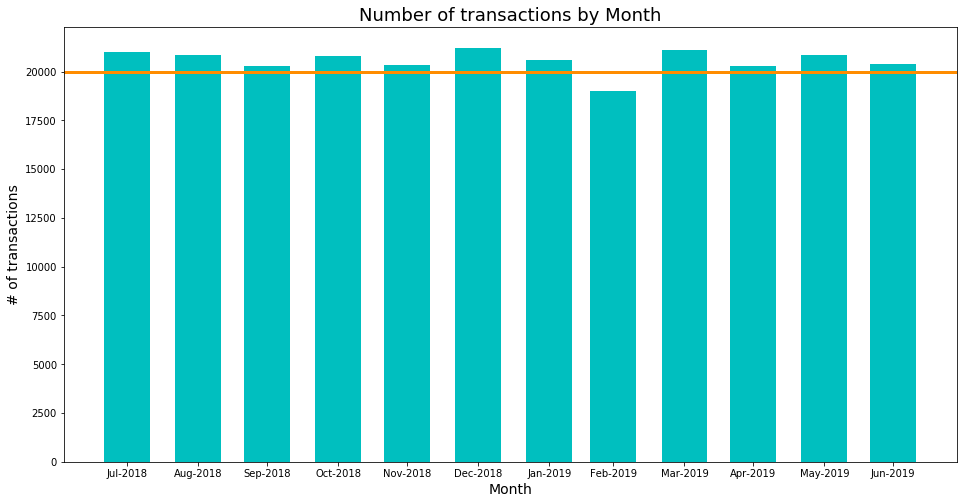

In [36]:
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]
fig, ax = plt.subplots()
ax.bar(df_tran_by_date4["DATE"], df_tran_by_date4["COUNT_TRAN"], width = 20, color="c")
ax.axhline(linewidth=3, color='darkorange', y=20000)
xfmt = mdates.DateFormatter('%b-%Y')
ax.set_xticks(df_tran_by_date4["DATE"])
ax.xaxis.set_major_formatter(xfmt)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('# of transactions', fontsize=14)
ax.set_title('Number of transactions by Month', fontsize=18)

plt.show()

In [38]:
df_tran_by_date3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        365 non-null    datetime64[ns]
 1   COUNT_TRAN  364 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.6 KB


In [39]:
#createa table for transaction in December 2018
df_tran_by_date5 = df_tran_by_date3[(df_tran_by_date3["DATE"]>= "2018-12-01")&(df_tran_by_date3["DATE"]<= "2018-12-31")]

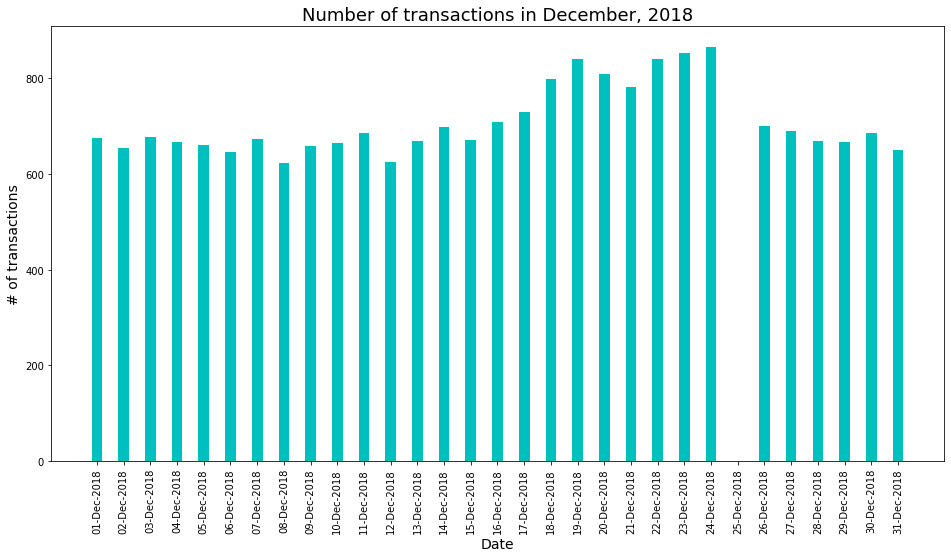

In [40]:
fig, ax = plt.subplots()
ax.bar(df_tran_by_date5["DATE"], df_tran_by_date5["COUNT_TRAN"], width = 0.4, color="c")
#ax.axhline(linewidth=3, color='darkorange', y=20000)
xfmt = mdates.DateFormatter('%d-%b-%Y')
ax.set_xticks(df_tran_by_date5["DATE"])
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=90)
ax.xaxis.set_major_formatter(xfmt)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('# of transactions', fontsize=14)
ax.set_title('Number of transactions in December, 2018', fontsize=18)

plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that
there are zero sales on Christmas day itself. This is due to shops being closed on
Christmas day.

### Pack Size

Now that we are satisfied that the data no longer has outliers, we can move on to
creating other features such as brand of chips or pack size from PROD_NAME. We will
start with pack size.

In [41]:
#### Pack size
#### We can work this out by taking the digits that are in PROD_NAM
df_tran_2["PACK_SIZE"] = df_tran_2["PROD_NAME"].str.extract('(\d+)').astype("int32")

In [42]:
print("The mimimal package size is " + str(df_tran_2["PACK_SIZE"].min()))
print("The maximum package size is " + str(df_tran_2["PACK_SIZE"].max()))

The mimimal package size is 70
The maximum package size is 380


The largest size is 380g and the smallest size is 70g - seems sensible! <br>
Let's plot a histogram of PACK_SIZE since we know that it is a categorical
variable and not a continuous variable even though it is numeric.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117cee290>]],
      dtype=object)

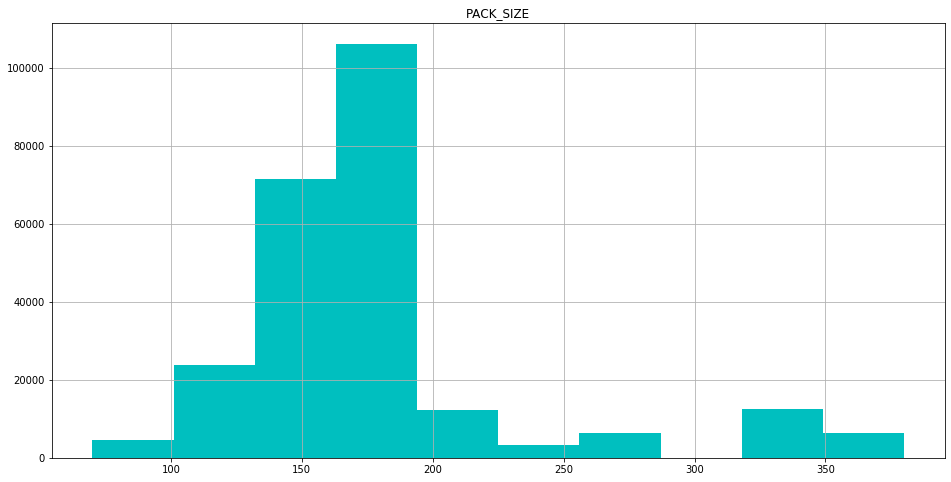

In [43]:
# Plot a histogram showing the number of transactions by pack size.
df_tran_2.hist(column="PACK_SIZE", color="c")

Pack sizes created look reasonable.

### Brand Name

Now to create brands, we can use the first word in PROD_NAME to work out the brand name

In [44]:
# Create a column which contains the brand of the product, by extracting it from the product name.
df_tran_2["BRAND"] = df_tran_2["PROD_NAME"].str.split(' ').str[0]
df_tran_2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos


In [45]:
df_tran_2["BRAND"].value_counts()

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

Some of the brand names look like they are of the same brands - such as RED and
RRD, which are both Red Rock Deli chips. Let's combine these together.

#### Clean brand names

In [46]:
# Clean brand names
df_tran_2.loc[df_tran_2["BRAND"] == "Red" , "BRAND"] = "RRD"
df_tran_2["BRAND"].value_counts()

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
RRD           16321
Thins         14075
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

In [47]:
#Dorito -> Doritos
#Infzns -> Infuzions
#Smith -> Smiths
#Snbts -> Sunbites
#GrnWves -> Grain
#NCC -> Natural
#WW -> Woolworths
df_tran_2.loc[df_tran_2["BRAND"] == "Dorito" , "BRAND"] = "Doritos"
df_tran_2.loc[df_tran_2["BRAND"] == "Infzns" , "BRAND"] = "Infuzions"
df_tran_2.loc[df_tran_2["BRAND"] == "Smith" , "BRAND"] = "Smiths"
df_tran_2.loc[df_tran_2["BRAND"] == "Snbts" , "BRAND"] = "Sunbites"
df_tran_2.loc[df_tran_2["BRAND"] == "GrnWves" , "BRAND"] = "Grain"
df_tran_2.loc[df_tran_2["BRAND"] == "NCC" , "BRAND"] = "Natural"
df_tran_2.loc[df_tran_2["BRAND"] == "WW" , "BRAND"] = "Woolworths"
# Check the results look reasonable. 
df_tran_2["BRAND"].value_counts()

Kettle        41288
Smiths        30353
Doritos       25224
Pringles      25102
RRD           16321
Infuzions     14201
Thins         14075
Woolworths    11836
Cobs           9693
Tostitos       9471
Twisties       9454
Grain          7740
Natural        7469
Tyrrells       6442
Cheezels       4603
CCs            4551
Sunbites       3008
Cheetos        2927
Burger         1564
French         1418
Name: BRAND, dtype: int64

Now that we are happy with the transaction dataset, let's have a look at the
customer dataset.

## Exploratory data analysis

### Examining customer data

In [48]:
df_pur_1

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [49]:
df_customer_grouped = df_pur_1.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).size().reset_index(name="COUNT").sort_values("COUNT")

In [50]:
df_customer_grouped

,LIFESTAGE,PREMIUM_CUSTOMER,COUNT
5,NEW FAMILIES,Premium,588
4,NEW FAMILIES,Mainstream,849
3,NEW FAMILIES,Budget,1112
0,MIDAGE SINGLES/COUPLES,Budget,1504
8,OLDER FAMILIES,Premium,2273
2,MIDAGE SINGLES/COUPLES,Premium,2431
17,YOUNG FAMILIES,Premium,2433
20,YOUNG SINGLES/COUPLES,Premium,2574
16,YOUNG FAMILIES,Mainstream,2728
7,OLDER FAMILIES,Mainstream,2831


In [51]:
df_customer_grouped_pivot = df_customer_grouped.pivot_table(values=['COUNT'], index=['LIFESTAGE'], columns=['PREMIUM_CUSTOMER'], aggfunc='sum')
df_customer_grouped_pivot.columns = df_customer_grouped_pivot.columns.droplevel(0)
df_customer_grouped_pivot.rename_axis(None, axis=1)

,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1504,3340,2431
NEW FAMILIES,1112,849,588
OLDER FAMILIES,4675,2831,2273
OLDER SINGLES/COUPLES,4929,4930,4750
RETIREES,4454,6479,3872
YOUNG FAMILIES,4017,2728,2433
YOUNG SINGLES/COUPLES,3779,8088,2574


In [52]:
df_customer_grouped_pivot2 = df_customer_grouped_pivot
df_customer_grouped_pivot2["TOTAL"] = df_customer_grouped_pivot2["Budget"] + df_customer_grouped_pivot2["Mainstream"] + df_customer_grouped_pivot2["Premium"]
df_customer_grouped_pivot2 = df_customer_grouped_pivot2.sort_values('TOTAL', ascending=False)

In [53]:
df_customer_grouped_pivot
df_customer_grouped_pivot_p = df_customer_grouped_pivot.apply(lambda x:x/sum(x),axis=1)
df_customer_grouped_pivot_p

PREMIUM_CUSTOMER,Budget,Mainstream,Premium,TOTAL
LIFESTAGE,,,,
MIDAGE SINGLES/COUPLES,0.103368,0.229553,0.167079,0.5
NEW FAMILIES,0.218125,0.166536,0.115339,0.5
OLDER FAMILIES,0.239033,0.144749,0.116218,0.5
OLDER SINGLES/COUPLES,0.168697,0.168732,0.162571,0.5
RETIREES,0.150422,0.218811,0.130767,0.5
YOUNG FAMILIES,0.218839,0.148616,0.132545,0.5
YOUNG SINGLES/COUPLES,0.130843,0.280036,0.089121,0.5


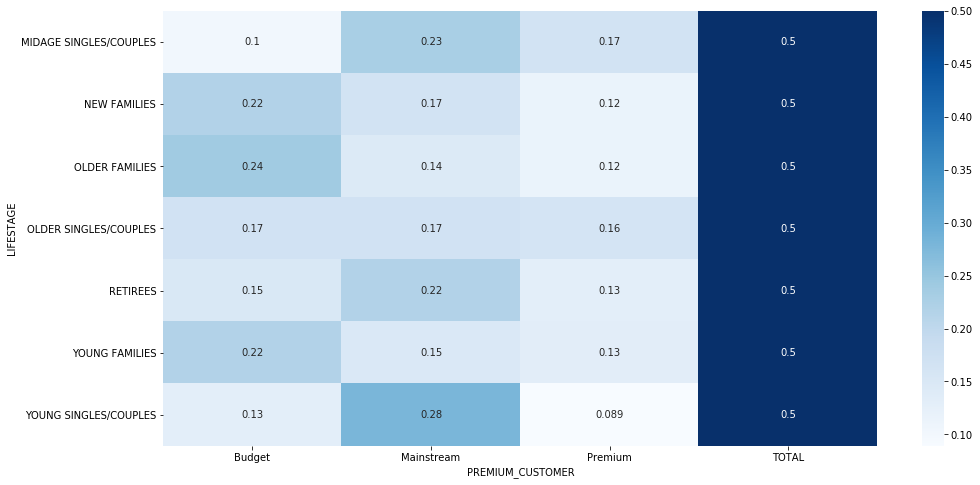

In [54]:
import seaborn as sns
plt.figure()
sns.heatmap(df_customer_grouped_pivot_p,  annot=True, cmap='Blues')
#h = heatmap(df_pur_1,"LIFESTAGE", "PREMIUM_CUSTOMER");

We can see that families often are budget customers while singles/couples and retirees often are mainstream customers.<br>
Older singles/couples are equaly distributed among budget/mainstream and premium customers. <br>
Additionally, more than 30% of midage and older single/couples are premium customers, the proportion is expecially low for young single/couples.

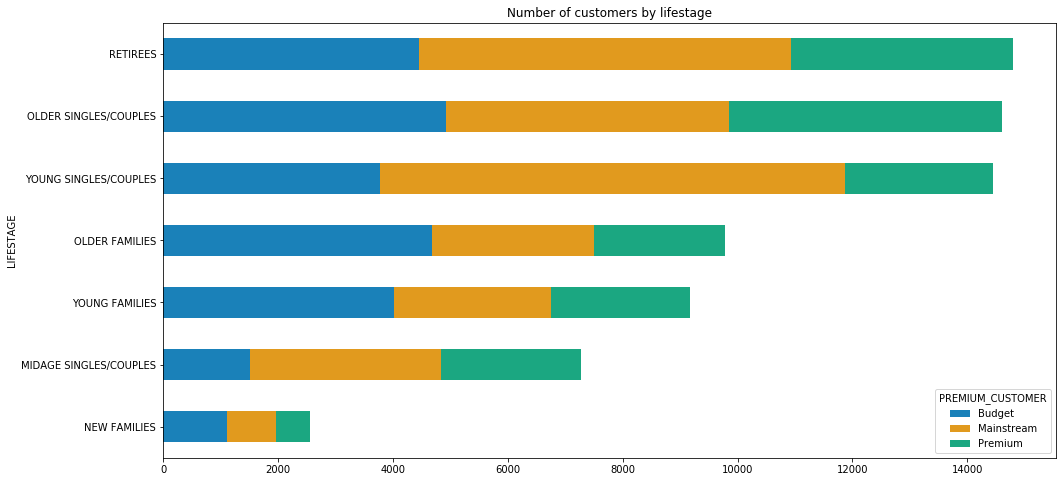

In [55]:
df_customer_grouped_pivot2.iloc[:, :3].plot(kind='barh', alpha=.9, color=sns.color_palette("colorblind"), title='Number of customers by lifestage', stacked=True).invert_yaxis()

Comparing the number of customers by lifestage, we can see that retirees consists of the largest percentage for chip puhsasing. <br>
This is followed by older and young singles/couples.

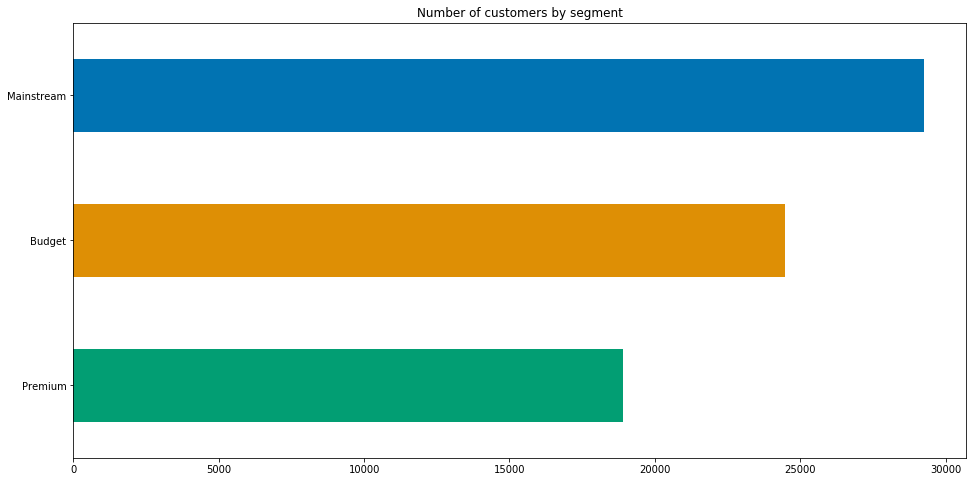

In [56]:
df_pur_1["PREMIUM_CUSTOMER"].value_counts().plot.barh(color=sns.color_palette("colorblind"),title='Number of customers by segment').invert_yaxis()

#### Merge transaction data to customer data

In [57]:
df_merged = pd.merge(df_tran_2, df_pur_1, left_on="LYLTY_CARD_NBR", right_on = "LYLTY_CARD_NBR", how='left')
df_merged.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


### Check for missing customer details

In [58]:
df_merged[(df_merged["LIFESTAGE"].isnull())|(df_merged["PREMIUM_CUSTOMER"].isnull())]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER


Great, there are no nulls! So all our customers in the transaction data has been
accounted for in the customer dataset.

In [59]:
# download the data as a csv file
df_merged.to_csv('./transctions_merged.csv')

## Data analysis on customer segments 

Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and
plotting the split by these segments to describe which customer segment contribute
most to chip sales.

#### Total sales by LIFESTAGE and PREMIUM_CUSTOMER

In [60]:
df_sales_analysis = df_merged.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().to_frame().sort_values('TOT_SALES', ascending=False)

In [61]:
df_sales_analysis.reset_index(inplace=True)

In [62]:
df_sales_analysis["LIFE STAGE & SEGMENT"] = df_sales_analysis["LIFESTAGE"] + " - " + df_sales_analysis["PREMIUM_CUSTOMER"]

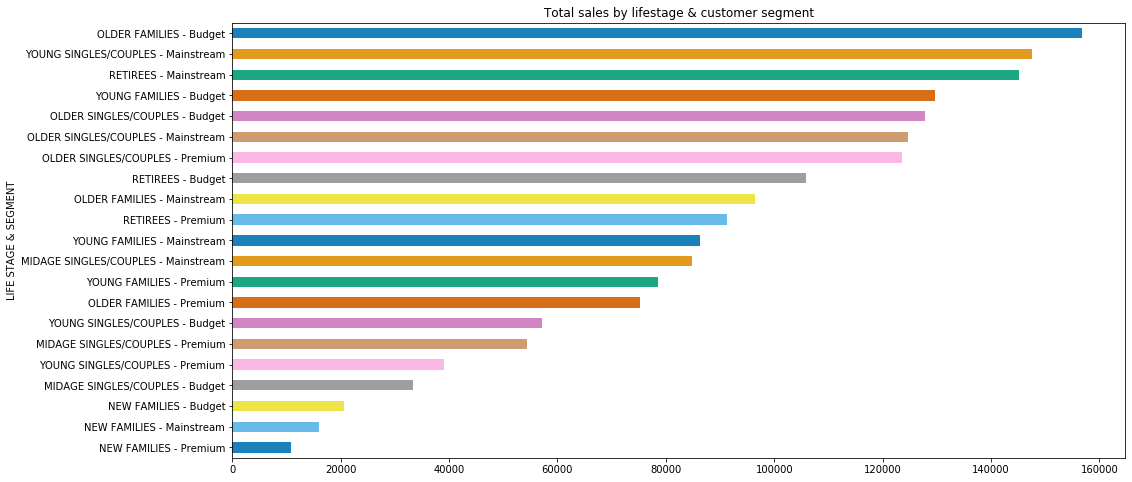

In [63]:
df_sales_analysis.plot(x="LIFE STAGE & SEGMENT", y= "TOT_SALES", kind='barh', alpha=.9, color=sns.color_palette("colorblind"), title='Total sales by lifestage & customer segment', legend=False).invert_yaxis()

Sales are coming mainly from Budget - older families, Mainstream - young
singles/couples, and Mainstream - retirees
Let's see if the higher sales are due to there being more customers who buy chips.

### Number of customers by LIFESTAGE and PREMIUM_CUSTOMER

In [64]:
#Calculate the summary of number of customers by those dimensions and create a plot.
df_customer_grouped["LIFE STAGE & SEGMENT"] = df_customer_grouped["LIFESTAGE"] + " - " + df_customer_grouped["PREMIUM_CUSTOMER"]

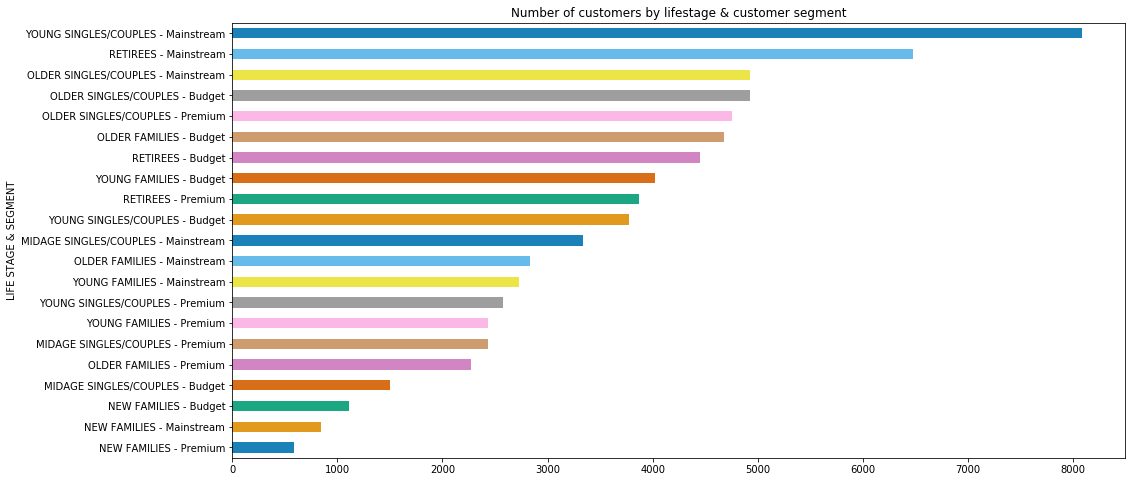

In [65]:
df_customer_grouped.plot(x="LIFE STAGE & SEGMENT", y= "COUNT", kind='barh', alpha=.9, color=sns.color_palette("colorblind"), title='Number of customers by lifestage & customer segment', legend=False)

There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but
this is not a major driver for the Budget - Older families segment.
Higher sales may also be driven by more units of chips being bought per customer.
Let's have a look at this next.

### Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

In [66]:
# Calculate and plot the average number of units per customer by those two dimensions.
df_units_per_cust = pd.DataFrame(df_merged["PROD_QTY"].groupby(df_merged["LYLTY_CARD_NBR"]).sum())
df_units_per_cust

,PROD_QTY
LYLTY_CARD_NBR,
1000,2
1002,1
1003,2
1004,1
1005,1
...,...
2370651,2
2370701,2
2370751,2


In [67]:
df_units_per_cust_1 = pd.merge(df_units_per_cust, df_pur_1, left_on="LYLTY_CARD_NBR", right_on = "LYLTY_CARD_NBR", how='left')
df_units_per_cust_1

,LYLTY_CARD_NBR,PROD_QTY,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2,YOUNG SINGLES/COUPLES,Premium
1,1002,1,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2,YOUNG FAMILIES,Budget
3,1004,1,OLDER SINGLES/COUPLES,Mainstream
4,1005,1,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...,...
71282,2370651,2,MIDAGE SINGLES/COUPLES,Mainstream
71283,2370701,2,YOUNG FAMILIES,Mainstream
71284,2370751,2,YOUNG FAMILIES,Premium
71285,2370961,2,OLDER FAMILIES,Budget


In [68]:
 df_units_per_cust_2 = pd.DataFrame(df_units_per_cust_1.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].mean()).sort_values("PROD_QTY", ascending=False)

In [69]:
df_units_per_cust_2.reset_index(inplace=True)

In [70]:
df_units_per_cust_2

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,OLDER FAMILIES,Mainstream,9.255380
1,OLDER FAMILIES,Budget,9.076773
2,OLDER FAMILIES,Premium,9.071717
3,YOUNG FAMILIES,Budget,8.722995
4,YOUNG FAMILIES,Premium,8.716013
5,YOUNG FAMILIES,Mainstream,8.638361
6,OLDER SINGLES/COUPLES,Budget,6.781398
7,OLDER SINGLES/COUPLES,Premium,6.769543
8,OLDER SINGLES/COUPLES,Mainstream,6.712021
9,MIDAGE SINGLES/COUPLES,Mainstream,6.432080


Older families and young families in general buy more chips per customer

### Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

Let's also investigate the average price per unit chips bought for each customer
segment as this is also a driver of total sales.

In [71]:
# Calculate and plot the average price per unit sold (average sale price) by those two customer dimensions.

In [72]:
df_merged["SALES_PER_UNIT"] = (df_merged["TOT_SALES"]/df_merged["PROD_QTY"])

In [73]:
df_merged.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,SALES_PER_UNIT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60


In [74]:
df_price_per_unit = pd.DataFrame(df_merged["SALES_PER_UNIT"].groupby([df_merged["PREMIUM_CUSTOMER"], df_merged["LIFESTAGE"]]).mean()).sort_values("SALES_PER_UNIT", ascending=False)
df_price_per_unit.reset_index(inplace=True)
df_price_per_unit

,PREMIUM_CUSTOMER,LIFESTAGE,SALES_PER_UNIT
0,Mainstream,YOUNG SINGLES/COUPLES,4.065642
1,Mainstream,MIDAGE SINGLES/COUPLES,3.994241
2,Budget,RETIREES,3.924404
3,Premium,RETIREES,3.920942
4,Budget,NEW FAMILIES,3.917688
5,Mainstream,NEW FAMILIES,3.916133
6,Premium,OLDER SINGLES/COUPLES,3.893182
7,Budget,OLDER SINGLES/COUPLES,3.882096
8,Premium,NEW FAMILIES,3.872110
9,Mainstream,RETIREES,3.844294


In [75]:
df_price_per_unit["LIFE STAGE & SEGMENT"] = df_price_per_unit["LIFESTAGE"] + " - " + df_price_per_unit["PREMIUM_CUSTOMER"]
df_price_per_unit

,PREMIUM_CUSTOMER,LIFESTAGE,SALES_PER_UNIT,LIFE STAGE & SEGMENT
0,Mainstream,YOUNG SINGLES/COUPLES,4.065642,YOUNG SINGLES/COUPLES - Mainstream
1,Mainstream,MIDAGE SINGLES/COUPLES,3.994241,MIDAGE SINGLES/COUPLES - Mainstream
2,Budget,RETIREES,3.924404,RETIREES - Budget
3,Premium,RETIREES,3.920942,RETIREES - Premium
4,Budget,NEW FAMILIES,3.917688,NEW FAMILIES - Budget
5,Mainstream,NEW FAMILIES,3.916133,NEW FAMILIES - Mainstream
6,Premium,OLDER SINGLES/COUPLES,3.893182,OLDER SINGLES/COUPLES - Premium
7,Budget,OLDER SINGLES/COUPLES,3.882096,OLDER SINGLES/COUPLES - Budget
8,Premium,NEW FAMILIES,3.872110,NEW FAMILIES - Premium
9,Mainstream,RETIREES,3.844294,RETIREES - Mainstream


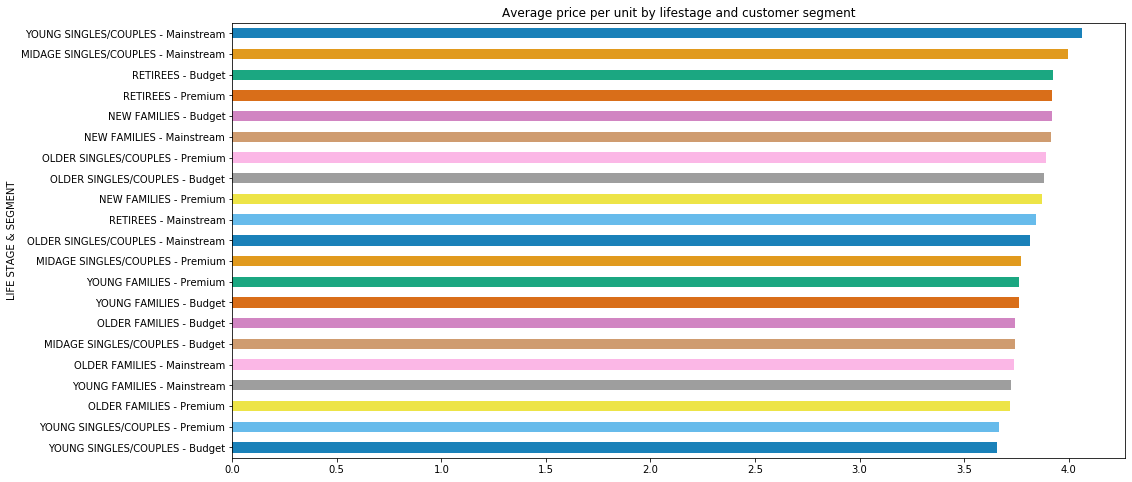

In [76]:
df_price_per_unit.plot(x="LIFE STAGE & SEGMENT" , y="SALES_PER_UNIT" , kind='barh', alpha=.9, color=sns.color_palette("colorblind"), title="Average price per unit by lifestage and customer segment", legend=False).invert_yaxis()

Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.

### Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples

Null Hypothesis: Average price per unit are the same for mainstream and premium + budger friendly midage and young singles and couples. <br>
Althernate Hypothesis: Average price per unit are different for mainstream and premium + budger friendly midage and young singles and couples.

In [77]:
df_t_test_a = df_merged[((df_merged["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES")| (df_merged["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")) & (df_merged["PREMIUM_CUSTOMER"]=="Mainstream")]
df_t_test_a.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,SALES_PER_UNIT
4692,2019-05-18,3,3159,1759,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170,Doritos,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4693,2019-05-16,3,3294,2370,51,Doritos Mexicana 170g,2,8.8,170,Doritos,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4694,2018-08-18,4,4187,3492,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,MIDAGE SINGLES/COUPLES,Mainstream,5.4
4695,2019-05-19,4,4264,3841,47,Doritos Corn Chips Original 170g,2,8.8,170,Doritos,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4696,2018-08-19,7,7036,6447,114,Kettle Sensations Siracha Lime 150g,1,4.6,150,Kettle,MIDAGE SINGLES/COUPLES,Mainstream,4.6


In [78]:
df_t_test_b = df_merged[((df_merged["LIFESTAGE"]=="MIDAGE SINGLES/COUPLES")| (df_merged["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")) & (df_merged["PREMIUM_CUSTOMER"] !="Mainstream")]
df_t_test_b.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,SALES_PER_UNIT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60


In [79]:
import scipy.stats as stats
stats.shapiro(df_t_test_a["SALES_PER_UNIT"])

/Users/ShinnoOh/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.974557101726532, 0.0)

In [80]:
stats.shapiro(df_t_test_b["SALES_PER_UNIT"])

(0.9728584289550781, 0.0)

In [81]:
from scipy.stats import ttest_ind

ttest_ind(df_t_test_a["SALES_PER_UNIT"], df_t_test_b["SALES_PER_UNIT"])

Ttest_indResult(statistic=37.83196107667815, pvalue=2.235645611549355e-309)

The t-test results in a p-value of 2.24e^-309, i.e. the unit price for mainstream,
young and mid-age singles and couples ARE significantly higher than
that of budget or premium, young and midage singles and couples.

## Deep dive into specific customer segments for insights

We have found quite a few interesting insights that we can dive deeper into.
We might want to target customer segments that contribute the most to sales to
retain them or further increase sales. Let's look at Mainstream - young
singles/couples. For instance, let's find out if they tend to buy a particular
brand of chips.

In [82]:
#pip install mlxtend  

In [83]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [84]:
# Deep dive into Mainstream, young singles/couples 
# Work out of there are brands that these two customer segments prefer more than others. You could use a technique called affinity analysis or a-priori analysis
df_mainstream_youngsingles = df_merged[(df_merged["LIFESTAGE"]=="YOUNG SINGLES/COUPLES") & (df_merged["PREMIUM_CUSTOMER"]=="Mainstream")]
df_mainstream_youngsingles.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,SALES_PER_UNIT
221345,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag&Sauce 150g,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
221346,2018-08-17,1,1163,188,46,Kettle Original 175g,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
221347,2018-08-14,1,1291,333,27,WW Supreme Cheese Corn Chips 200g,1,1.9,200,Woolworths,YOUNG SINGLES/COUPLES,Mainstream,1.9
221348,2019-05-15,3,3031,1227,14,Smiths Crnkle Chip Orgnl Big Bag 380g,1,5.9,380,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.9
221349,2019-05-18,3,3118,1574,62,Pringles Mystery Flavour 134g,1,3.7,134,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7


In [85]:
df_others = df_merged[~((df_merged["LIFESTAGE"] =="YOUNG SINGLES/COUPLES") & (df_merged["PREMIUM_CUSTOMER"]=="Mainstream"))]
df_others.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,SALES_PER_UNIT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60


In [86]:
basket_mainstream_young = (df_mainstream_youngsingles.groupby(["TXN_ID","BRAND"])["PROD_QTY"]
        .sum().unstack().reset_index().fillna(0)
        .set_index("TXN_ID"))

basket_others = (df_others.groupby(["TXN_ID","BRAND"])["PROD_QTY"]
        .sum().unstack().reset_index().fillna(0)
        .set_index("TXN_ID"))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets_mainstream_young = basket_mainstream_young.applymap(encode_units)
print(basket_sets_mainstream_young.head(5))

BRAND   Burger  CCs  Cheetos  Cheezels  Cobs  Doritos  French  Grain  \
TXN_ID                                                                 
2            0    0        0         0     0        0       0      0   
10           0    0        0         0     0        1       0      0   
22           0    0        0         0     0        0       0      0   
23           0    0        0         0     0        0       0      0   
24           0    0        0         0     0        0       0      0   

BRAND   Infuzions  Kettle  Natural  Pringles  RRD  Smiths  Sunbites  Thins  \
TXN_ID                                                                       
2               0       0        0         0    1       0         0      0   
10              0       0        0         0    0       0         0      0   
22              0       1        0         0    0       0         0      0   
23              0       0        0         0    1       0         0      0   
24              1       0  

In [87]:
basket_sets_others = basket_others.applymap(encode_units)
print(basket_sets_others.head(5))

BRAND   Burger  CCs  Cheetos  Cheezels  Cobs  Doritos  French  Grain  \
TXN_ID                                                                 
1            0    0        0         0     0        0       0      0   
3            0    0        0         0     0        0       0      1   
4            0    0        0         0     0        0       0      0   
5            0    0        0         0     0        0       0      0   
6            0    0        1         0     0        0       0      0   

BRAND   Infuzions  Kettle  Natural  Pringles  RRD  Smiths  Sunbites  Thins  \
TXN_ID                                                                       
1               0       0        1         0    0       0         0      0   
3               0       0        0         0    0       0         0      0   
4               0       0        1         0    0       0         0      0   
5               0       0        0         0    0       0         0      0   
6               0       0  

In [88]:
frequent_itemsets_mainstream_young = apriori(basket_sets_mainstream_young, min_support=0.05, use_colnames=True)
frequent_itemsets_mainstream_young.sort_values(by="support", ascending=False)

,support,itemsets
2,0.197310,(Kettle)
0,0.122061,(Doritos)
3,0.118828,(Pringles)
4,0.098553,(Smiths)
1,0.064110,(Infuzions)
5,0.059850,(Thins)


In [89]:
frequent_itemsets_others = apriori(basket_sets_others, min_support=0.05, use_colnames=True)
frequent_itemsets_others.sort_values(by="support", ascending=False)

,support,itemsets
2,0.165711,(Kettle)
5,0.125821,(Smiths)
0,0.101102,(Doritos)
3,0.100889,(Pringles)
4,0.068370,(RRD)
1,0.057354,(Infuzions)
6,0.057164,(Thins)
7,0.050276,(Woolworths)


In [90]:
frequency_comparison = pd.merge(frequent_itemsets_mainstream_young, frequent_itemsets_others, how="outer", on="itemsets")
frequency_comparison = frequency_comparison[["itemsets", "support_x", "support_y"]]
frequency_comparison = frequency_comparison.rename(columns={"support_x": "Support (Mainstream Young Single/Couple)", "support_y": "Support (Others)"})
frequency_comparison["Difference"] = frequency_comparison["Support (Mainstream Young Single/Couple)"]-frequency_comparison["Support (Others)"]
frequency_comparison.sort_values(by="Difference", ascending=False).reset_index()

,index,itemsets,Support (Mainstream Young Single/Couple),Support (Others),Difference
0,2,(Kettle),0.197310,0.165711,0.031600
1,0,(Doritos),0.122061,0.101102,0.020960
2,3,(Pringles),0.118828,0.100889,0.017939
3,1,(Infuzions),0.064110,0.057354,0.006756
4,5,(Thins),0.059850,0.057164,0.002687
5,4,(Smiths),0.098553,0.125821,-0.027269
6,6,(RRD),NaN,0.068370,NaN
7,7,(Woolworths),NaN,0.050276,NaN


#### Insights

According to the support values, 19.7% of chips transactions made by Mainstream Young Singles/Couples contains the Kettle brand. <br>
This is followed by Doritos with 12.2% and Pringles of 11.9%. <br>
<br>
By comparing support values (frquency of an item being purchased) of Mainstream Young Singles/Couples and those of others, it can be seen
that **Kettle**, **Doritos**, **Pringles** are the three major brands that Mainstream Young Singles/Couples buy more frequently than customers in other segments. <br>
For example, Kettle is bought 3% more often by the customers in the target segments than others.

#### Preferred pack size compared to the rest of the population

Let's also find out if our target segment tends to buy larger packs of chips.

In [91]:
basket_mainstream_young_ps = (df_mainstream_youngsingles.groupby(["TXN_ID","PACK_SIZE"])["PROD_QTY"]
        .sum().unstack().reset_index().fillna(0)
        .set_index("TXN_ID"))

basket_others_ps = (df_others.groupby(["TXN_ID","PACK_SIZE"])["PROD_QTY"]
        .sum().unstack().reset_index().fillna(0)
        .set_index("TXN_ID"))

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets_mainstream_young_ps = basket_mainstream_young_ps.applymap(encode_units)
basket_sets_others_ps = basket_others_ps.applymap(encode_units)

In [92]:
frequent_itemsets_mainstream_young_ps = apriori(basket_sets_mainstream_young_ps, min_support=0.05, use_colnames=True)
frequent_itemsets_mainstream_young_ps.sort_values(by="support", ascending=False)

,support,itemsets
5,0.256288,(175)
2,0.157992,(150)
1,0.118828,(134)
0,0.105225,(110)
4,0.080741,(170)
6,0.061339,(330)
3,0.056565,(165)


In [93]:
frequent_itemsets_others_ps = apriori(basket_sets_others_ps, min_support=0.05, use_colnames=True)
frequent_itemsets_others_ps.sort_values(by="support", ascending=False)

,support,itemsets
5,0.271490,(175)
2,0.164307,(150)
1,0.100889,(134)
0,0.090037,(110)
4,0.081480,(170)
3,0.062842,(165)
6,0.050232,(330)


In [94]:
frequency_comparison_ps = pd.merge(frequent_itemsets_mainstream_young_ps, frequent_itemsets_others_ps, how="outer", on="itemsets")
frequency_comparison_ps = frequency_comparison_ps[["itemsets", "support_x", "support_y"]]
frequency_comparison_ps = frequency_comparison_ps.rename(columns={"support_x": "Support (Mainstream Young Single/Couple)", "support_y": "Support (Others)"})
frequency_comparison_ps["Difference"] = frequency_comparison_ps["Support (Mainstream Young Single/Couple)"]-frequency_comparison_ps["Support (Others)"]
frequency_comparison_ps.sort_values(by="Difference", ascending=False).reset_index()

,index,itemsets,Support (Mainstream Young Single/Couple),Support (Others),Difference
0,1,(134),0.118828,0.100889,0.017939
1,0,(110),0.105225,0.090037,0.015188
2,6,(330),0.061339,0.050232,0.011107
3,4,(170),0.080741,0.081480,-0.000739
4,3,(165),0.056565,0.062842,-0.006277
5,2,(150),0.157992,0.164307,-0.006315
6,5,(175),0.256288,0.271490,-0.015202


#### Insights

According to the support values, 25.6% of chips transactions made by Mainstream Young Singles/Couples contains chips with 175g. <br>
This is followed by 150g with 15.8% and 134g of 11.9%. <br>
<br>
By comparing support values (frquency of an item being purchased) of Mainstream Young Singles/Couples and those of others, <br>
we can see that **134g**, **110g**, **330g** are the three popular package size that Mainstream Young Singles/Couples buy more frequently than customers in other segments. <br>
The package size of 330g, which is one of the largest sizes in packages for chips, is bought 1.1% more often by the customers in the target segments than others.